In [61]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

In [62]:
veri = {'T(C)':pd.Series([20.5, 32.7, 51, 73.2, 95.7]),
        'R(Ohm)':pd.Series([765, 826, 873, 942, 1032])}

df = pd.DataFrame(veri)
df

,R(Ohm),T(C)
0,765,20.5
1,826,32.7
2,873,51.0
3,942,73.2
4,1032,95.7


In [63]:
df.describe()

,R(Ohm),T(C)
count,5.000000,5.00000
mean,887.600000,54.62000
std,103.500242,30.37494
min,765.000000,20.50000
25%,826.000000,32.70000
50%,873.000000,51.00000
75%,942.000000,73.20000
max,1032.000000,95.70000


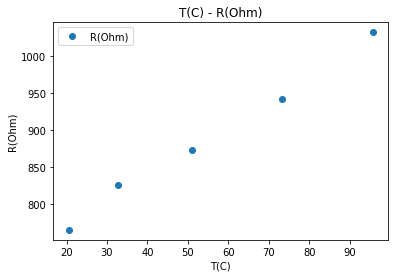

In [64]:
df.plot(x='T(C)', y='R(Ohm)', style='o')  
plt.title('T(C) - R(Ohm)')  
plt.xlabel('T(C)')  
plt.ylabel('R(Ohm)')  
plt.show() 

In [65]:
Y = df.iloc[:, 0].values  
X = df.iloc[:, 1:].values  

In [66]:
Y

array([ 765,  826,  873,  942, 1032])

In [67]:
X

array([[20.5],
       [32.7],
       [51. ],
       [73.2],
       [95.7]])

In [77]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)  

In [78]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
print("Kesim noktası:", model.intercept_)  

Kesim noktası: 702.9077063035368


In [80]:
print("Eğim:", model.coef_)

Eğim: [3.3920269]


In [81]:
X_test

array([[51.]])

In [82]:
y_pred = model.predict(X_test) 

In [83]:
df = pd.DataFrame({'Gerçek': y_test, 'Tahmin Edilen': y_pred})  
df 

,Gerçek,Tahmin Edilen
0,873,875.901078


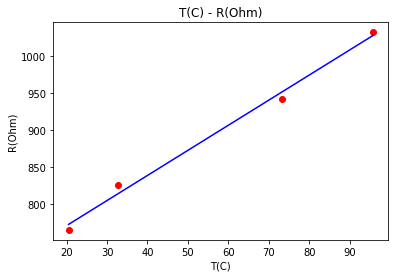

In [85]:
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = model.predict(X_train)
#plt.scatter(X_train, modelin_tahmin_ettigi_y, color = 'blue')
plt.plot(X_train, modelin_tahmin_ettigi_y, color = 'blue')
plt.title('T(C) - R(Ohm)')
plt.xlabel('T(C)')
plt.ylabel('R(Ohm)')
plt.show()

In [86]:
from sklearn import metrics   
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Squared Error (MSE): 8.416255137208877
Root Mean Squared Error (RMSE): 2.901078271472329
